# Tutorial Part I
In this notebook, you will learn how to model and analyze hypergraphs via the `hypergraphx` Python library.


# Hypergraph modeling with Hypergraphx
<code>Hypergraphx</code> is a Python package designed to model and analyze hypergraph structures, presented in the following article:

> Quintino Francesco Lotito, Martina Contisciani, Caterina De Bacco, Leonardo Di Gaetano, Luca Gallo, Alberto Montresor, Federico Musciotto, Nicolò Ruggeri, Federico Battiston, *Hypergraphx: a library for higher-order network analysis*, Journal of Complex Networks, Volume 11, Issue 3, June 2023, cnad019, https://doi.org/10.1093/comnet/cnad019


This Notebook is meant to be an introductory tutorial. For more advanced features, please refer to the official [documentation](hypergraphx.readthedocs.io/en/latest/#).

In this tutorial, we will use hgx v1.7.3.

The easiest way to install hypergraphx is via pip:


In [2]:
pip install hypergraphx==1.7.3

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Start by importing the library:

In [3]:
import hypergraphx as hgx

## Hypergraph manipulation

With <code>hgx</code>, (static, undirected) hypergraphs are modeled with the <code>Hypergraph</code> class. The first part of this tutorial will go through some of its basic functionalities.

There are several ways to create a hypergraph. You can directly pass the hyperedge list to the constructor. At creation, you must also specify whether the hypergraph will allow edge weights or not. If <code>weighted</code> is <code>True</code>, a list of edge weights must be provided via the <code>weights</code> parameter, otherwise a <code>ValueError</code> exception will be thrown.

In [4]:
hyperedge_list = [
    (1, 3),
    (1, 4),
    (1, 2),
    (5, 6, 7, 8),
    (1, 2, 3)
]

h = hgx.Hypergraph(hyperedge_list)

# weighted hypergraph
hw = hgx.Hypergraph(
    hyperedge_list,
    weighted = True,
    weights = [.4, .5, .9, .3, .3]
)

Printing the object displays some of its properties

In [5]:
print(h)

Hypergraph with 8 nodes and 5 edges.
Distribution of hyperedge sizes: {2: 3, 4: 1, 3: 1}


In [6]:
print(hw)

Hypergraph with 8 nodes and 5 edges.
Distribution of hyperedge sizes: {2: 3, 4: 1, 3: 1}


To add nodes, use the corresponding methods.

In [7]:
h.add_node(9) # one node at a time
h.add_nodes([10, 11, 12]) # list of nodes

Hyperedges can also be added to the hypergraph via the corresponding methods. In <code>hgx</code>, hyperedges are simply called "edges". Note that if the hypergraph is weighted you must also pass the weights.

If a node does not exist, it will be added automatically.

In [8]:
h.add_edge([9,10,11]) # one hyperedge at a time
h.add_edges([ # list of hyperedges
    [9,10],
    [9, 11, 12, 13]
])
# hw.add_edge([9,10,11])
# hw.add_edge([9,10,11], 0.1)

In [9]:
print(h)

Hypergraph with 13 nodes and 8 edges.
Distribution of hyperedge sizes: {2: 4, 4: 2, 3: 2}


Similarly, <code>hgx</code> also allows to remove nodes and edges.

In [10]:
h.remove_edge([9,11,12,13])
h.remove_node(13)

Let's check the node/edge does not exist anymore

In [11]:
h.check_node(13)

False

In [12]:
h.check_edge([9,11,12,13])

False

Hypergraphs can be conveniently represented with an adjacency matrix, where
- rows and columns refer to nodes, and
- values at the intersections represent the number of hyperedges two nodes share.


In [13]:
A = h.adjacency_matrix()
A.toarray()

array([[0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

We can also use an incidence matrix to represent a hypergraph, where
- rows represent nodes,
- columns represent hyperedges, and
- values at the intersections tell whether a hyperedge contains (1) a node or not (0). If the hypergraph is weighted, than each element of the matrix tells the weight of a given vertex within a specific hyperedge.

In [14]:
A = h.incidence_matrix()
A.toarray()

array([[1, 1, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [15]:
Aw = hw.incidence_matrix()
Aw.toarray()

array([[0.4, 0.5, 0.9, 0. , 0.3],
       [0. , 0. , 0.9, 0. , 0.3],
       [0.4, 0. , 0. , 0. , 0.3],
       [0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0.3, 0. ]])

Finally, a drawing utility is available in a separate module.

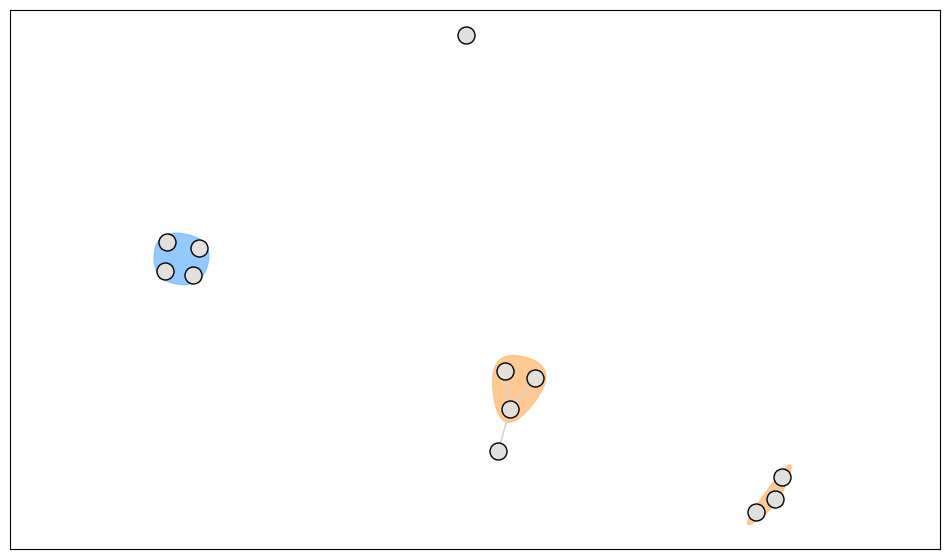

In [16]:
from hypergraphx.viz.draw_hypergraph import draw_hypergraph
draw_hypergraph(h)

# Hypergraph Analysis
In this section, we will go through basic commands to retrieve information from the hypergraph structure.


In [17]:
# get the number of nodes
h.num_nodes()

12

In [18]:
# get the number of hyperedges
h.num_edges()

7

In [19]:
# get the list of nodes
h.get_nodes()

[1, 3, 4, 2, 5, 6, 7, 8, 9, 10, 11, 12]

In [20]:
# get the list of hyperedges
h.get_edges()

[(1, 3), (1, 4), (1, 2), (5, 6, 7, 8), (1, 2, 3), (9, 10, 11), (9, 10)]

The <code>Hypergraph</code> object can act as an iterator over the **hyperedges**. Note this is different from e.g., <code>networkx</code>, where a similar syntax is used to iterate over nodes.

In [21]:
for edge in h:
    # do something
    print(edge)

((1, 3), 1)
((1, 4), 1)
((1, 2), 1)
((5, 6, 7, 8), 1)
((1, 2, 3), 1)
((9, 10, 11), 1)
((9, 10), 1)


We can retrieve the list of hyperedges containing a node by using the following function. All hyperedges incident to a node represent a local structure called **star**. The structure maps a node's entire *neighborhood* of interactions.

In [22]:
node_id = 1
h.get_incident_edges(node=node_id)

[(1, 3), (1, 4), (1, 2, 3), (1, 2)]

The following methods return booleans describing some structural characteristics of the hypergraph.
- In a *uniform* hypergraph, all hyperedges have the same size.

In [23]:
h.is_uniform(), h.is_weighted(), h.is_connected()

(False, False, False)

The node degree distribution can be computed as follows. This function returns a dictionary mapping degrees to the number of nodes having that degree. In hypergraphs, the degree of a node is the number of hyperedges incident on that node.

In [24]:
h.degree_distribution()

{4: 1, 2: 4, 1: 6, 0: 1}

To visually inspect node degree distribution:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_degree_distribution(h, loglog=False):
    cnt = h.degree_distribution()
    deg = cnt.keys()
    freq = cnt.values()
    ax = sns.scatterplot(x=deg, y=freq, alpha=.6)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')
    ax.set_title('Degree Distribution')
    ax.grid(alpha=.2)
    if loglog:
        ax.loglog()
    plt.show()

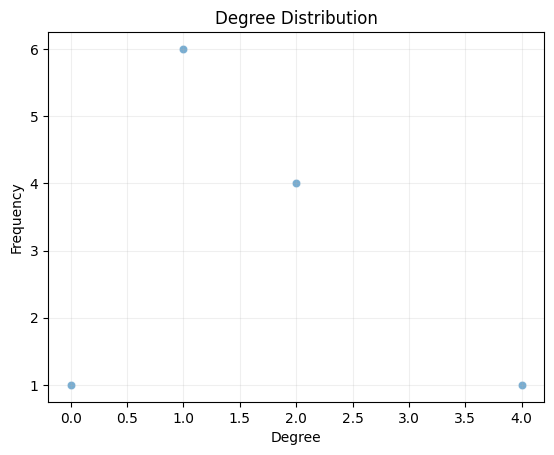

In [26]:
plot_degree_distribution(h, loglog=False)

Similarly, we can compute the hyperedge size distribution. The <code>get_sizes</code> method returns a list of sizes.

In [27]:
h.get_sizes()

[2, 2, 2, 4, 3, 3, 2]

We first need to count the number of edges for each size with the <code>Counter</code>.

In [28]:
from collections import Counter
Counter(h.get_sizes())

Counter({2: 4, 3: 2, 4: 1})

Then, to display the distribution:

In [29]:
def plot_size_distribution(h, loglog=False):
    cnt = Counter(h.get_sizes())
    deg = cnt.keys()
    freq = cnt.values()
    ax = sns.scatterplot(x=deg, y=freq, alpha=.6)
    ax.set_xlabel('Size')
    ax.set_ylabel('Frequency')
    ax.set_title('Size Distribution')
    ax.grid(alpha=.2)
    if loglog:
        ax.loglog()
    plt.show()

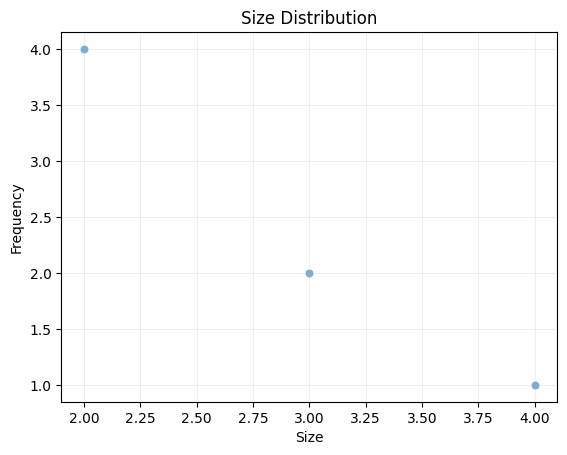

In [30]:
plot_size_distribution(h)

## Other measures and utilities
<code>hgx</code> offers a wide variety of features, including higher-order community detection, synthetic hypergraph generation, and motifs detection.

Generation of a random hypergraph with controlled number of nodes and hyperedge size distribution.

In [31]:
from hypergraphx.generation.random import random_hypergraph

# Generate a random hypergraph with a given number of nodes and hyperedges for each size.
# If a hyperedge is sampled multiple times, it will be added to the hypergraph only once.

rh = random_hypergraph(
      1000,
      {2:500 , 3: 300, 4: 100, 5: 50},
    )

In [32]:
print(rh)

Hypergraph with 1000 nodes and 950 edges.
Distribution of hyperedge sizes: {2: 500, 3: 300, 4: 100, 5: 50}


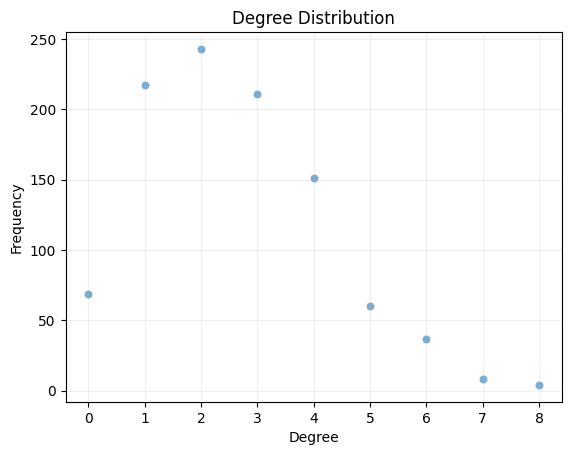

In [33]:
plot_degree_distribution(rh)

# Hypergraph I/O
The package offers dedicated methods to save and load hypergraphs to files. The supported file types are .json and .pickle

In [34]:
from hypergraphx.readwrite.save import save_hypergraph

In [35]:
save_hypergraph(rh, 'my_hypergraph.json', file_type='json')

In [36]:
from hypergraphx.readwrite.load import load_hypergraph

In [37]:
h = load_hypergraph('my_hypergraph.json', file_type='json')
print(h)

Hypergraph with 1000 nodes and 950 edges.
Distribution of hyperedge sizes: {2: 500, 3: 300, 4: 100, 5: 50}
